#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [162]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    e = y-(x.T@w_old)
    w = w_old + (2*lr/x.shape[1])*(x@e)
    return w

  def error(self,w,y,x):
    err=sum((y-np.matmul(x.T,w))**2)/x.shape[1]
    return err 
    

  def mat_inv(self,y,x_aug):
    w_optim = np.linalg.pinv(x_aug@x_aug.T)@(x_aug@y)
    return w_optim
  # By Gradien descent

  def Regression_grad_des(self,x,y,lr,w):
      err = []
      err_old = 0
      w_pred = w
      for i in range(900000):
          w_pred = self.grad_update(w_pred,lr,y,x)
          temp = self.error(w_pred,y,x)
          err.append(temp)
          dev = np.abs(temp-err_old)
          if dev <= 0.00002:
              break
          err_old = temp
          
      return w_pred,err


[14.79956966]
[14.79956966  2.51423394]
[-0.23816235  2.51423394  1.22832959]
[-0.23816235 -3.22094974  1.22832959  0.26029469]
[-2.05947929e-01 -3.22094974e+00  1.21955424e+00  2.60294695e-01
  2.78847914e-04]


Text(0.5, 1.0, '4-Degree Polynoimal')

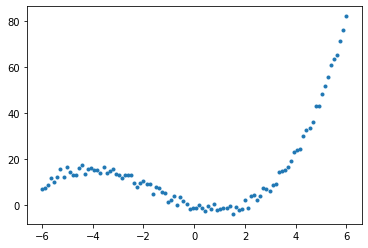

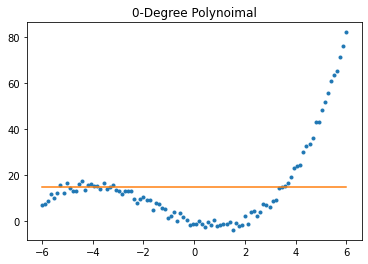

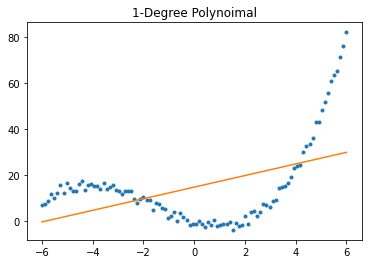

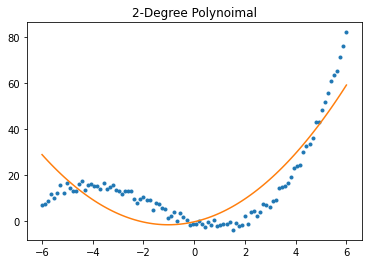

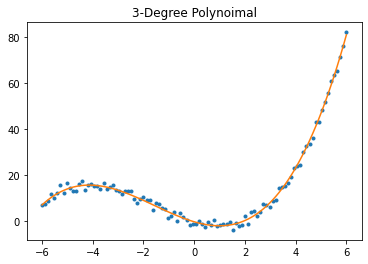

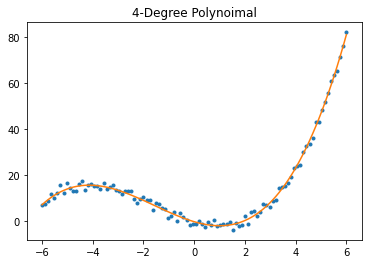

In [163]:
## Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]



w = [-3, -3, 1.25, 0.25]
## Function to transform the data into polynomial

def data_transform(X,degree):
  X_new = np.array([np.ones(np.shape(x)[1])])
  for i in range(1,degree + 1):
   X_new =  np.concatenate((X_new,np.array([np.array(X[0])**i])))
  return X_new


X = data_transform(x,3)

y = X.T @ w

y = y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 0
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
print(w_mat)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynoimal')

degree = 1
X_2 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_2)
y_pred=X_2.T @ w_mat
print(w_mat)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynoimal')

degree = 2
X_3 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_3)
y_pred=X_3.T @ w_mat
print(w_mat)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynoimal')

degree = 3
X_4 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_4)
y_pred=X_4.T @ w_mat
print(w_mat)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynoimal')

degree = 4
X_5 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_5)
y_pred=X_5.T @ w_mat
print(w_mat)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynoimal')


[14.79868648]
[14.77762221  2.5142339 ]
[-0.3839194   2.51200713  1.23495576]
[-0.39524214 -3.11238396  1.23547049  0.25615405]
[ 0.80370422 -2.08707545  1.08951502  0.21704928  0.00348476]


Text(0.5, 1.0, '4-Degree Polynoimal')

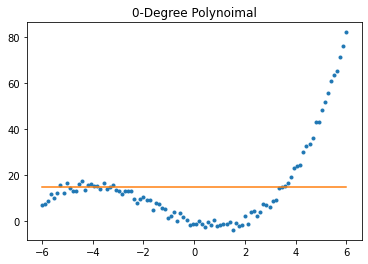

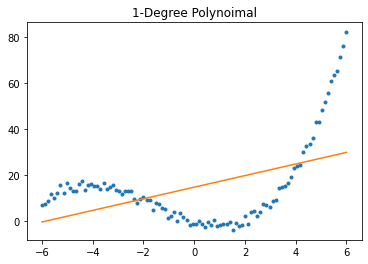

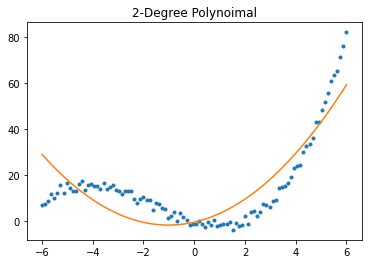

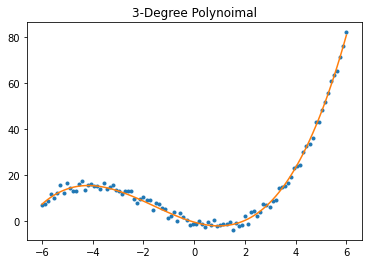

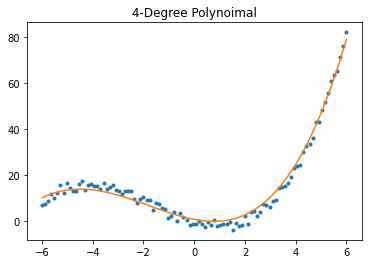

In [164]:
# By Gradient Descent 

degree = 0
X_1 = data_transform(x,degree)
w_grad,err = reg.Regression_grad_des(X_1,y,0.6,[1])
y_pred=X_1.T @ w_grad
print(w_grad)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynoimal')

degree = 1
X_2 = data_transform(x,degree)
w_grad,err = reg.Regression_grad_des(X_2,y,0.01,[14.73930258, 2.46952778])
y_pred=X_2.T @ w_grad
print(w_grad)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynoimal')

degree = 2
X_3 = data_transform(x,degree)
w_grad,err = reg.Regression_grad_des(X_3,y,0.001,[-0.40002616, 2.46952778, 1.24479665])
y_pred=X_3.T @ w_grad
print(w_grad)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynoimal')

degree = 3
X_4 = data_transform(x,degree)
w_grad,err = reg.Regression_grad_des(X_4,y,0.0001,[-0.40002616, -3.09574413, 1.24479665, 0.25258315])
y_pred=X_4.T @ w_grad
print(w_grad)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynoimal')

degree = 4
X_5 = data_transform(x,degree)
w_grad,err = reg.Regression_grad_des(X_5,y,0.000001,[1, 1, 1, 1, 1])
y_pred=X_5.T @ w_grad
print(w_grad)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynoimal')


# Linear Regression

  Generate the data as shown in the figure below


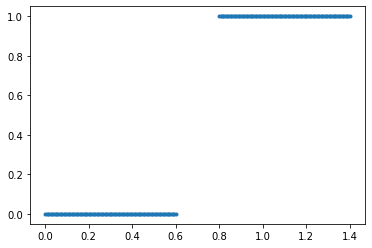

In [165]:
x1=np.linspace(0,0.6,100)
x2=np.linspace(0.8,1.4,100)
x=np.concatenate((x1,x2))

y=np.zeros(len(x))
y[x>0.6]=1
y=y.astype(int)

plt.plot(x,y,'.')
plt.show()

  Use the Regression class defined in the previous lab to fit the curve

In [166]:
reg = regression()

  Augment the Data and generate optimal weights

In [167]:


x_0=np.ones(len(x))
x_aug=np.array([x_0,x])
print('shape of x = ',x.shape)
print('shape of x_aug = ',x_aug.shape)

y.reshape(len(y),1)

w_opt_mat=reg.mat_inv(y,x_aug)
w_opt_grad,err=reg.Regression_grad_des(x_aug,y,0.4,[0,0])

shape of x =  (200,)
shape of x_aug =  (2, 200)


Using the optimal weights, fit the curve

weights using matinv =  [-0.23449921  1.04928458]
weights using grad desc =  [-0.21810207  1.02872532]
(200,)


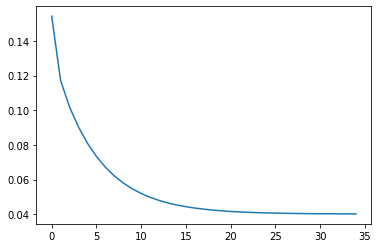

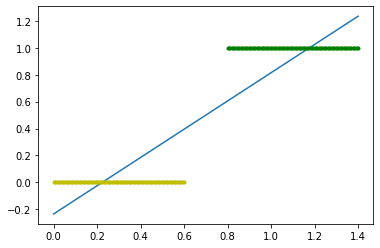

In [168]:
print('weights using matinv = ',w_opt_mat)
print('weights using grad desc = ',w_opt_grad)

print(y.shape)

plt.figure()
plt.plot(err)

plt.figure()
y_pred=x_aug.T @ w_opt_mat
plt.plot(x,y_pred)

plt.plot(x1,y[:100],'.',color='y')
plt.plot(x2,y[100:],'.',color='green')

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

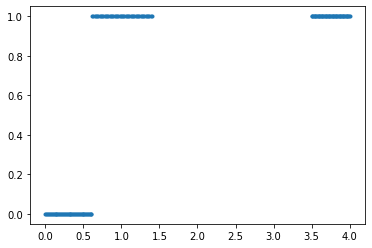

In [169]:
x1=np.linspace(0,0.6,50)
x2=np.linspace(0.6,1.4,50)
x3=np.linspace(3.5,4,50)
x=np.concatenate((x1,x2,x3))

y=np.zeros(150)
y[x>0.6]=1

plt.plot(x,y,'.')
plt.show()

shape of x =  (150,)
shape of x_aug =  (2, 150)
weights using grad desc =  [[0.29524859]
 [0.21318128]]
(150, 1)


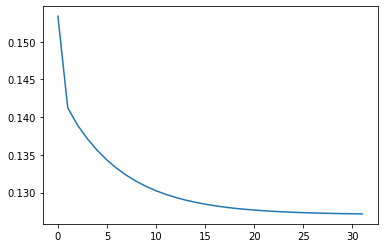

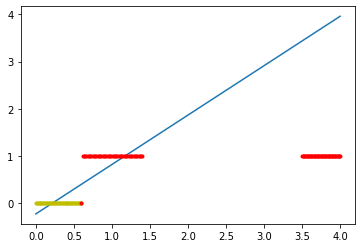

In [170]:
reg=regression()

x_zeros=np.ones(len(x))
x_aug=np.array([x_zeros,x])
print('shape of x = ',x.shape)
print('shape of x_aug = ',x_aug.shape)

y=y.reshape(len(y),1)

w_opt_grad,err=reg.Regression_grad_des(x_aug,y,0.1,[[0], [0]])

print('weights using grad desc = ',w_opt_grad)

print(y.shape)

plt.figure()
plt.plot(err)

plt.figure()
y_pred=x_aug.T @ w_opt_mat
plt.plot(x,y_pred)

plt.plot(x1,y[:50],'.',color='y')
plt.plot(x2,y[50:100],'.',color='red')
plt.plot(x3,y[100:],'.',color='red')

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

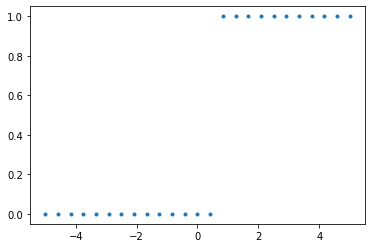

In [171]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [172]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)

N=len(y)

cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):

  # Compute Mean square error and logistic loss using cost function
  z = w0 + w1[i]*x
  yp=1/(1+np.exp(-(z)))
  mse=np.sum((yp-y)**(2))/(2*N)
  cost_fn_mse.append(mse)
  cost_logis=(-np.sum(y * np.log(yp+10**(-30))+(1-y)*np.log(1-yp+10**(-30)))/(N))
  cost_fn_logis.append(cost_logis)  


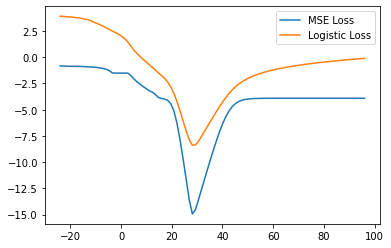

In [173]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

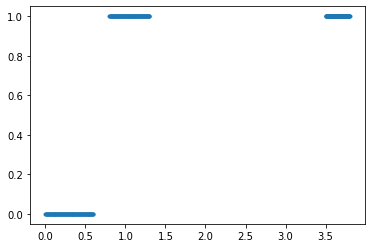

In [174]:
x1=np.linspace(0,0.6,100)
x2=np.linspace(0.8,1.3,100)
x3=np.linspace(3.5,3.8,100)
x=np.concatenate((x1,x2,x3))

y=np.ones(len(x))
y[x<=0.6]=0

plt.plot(x,y,'.')
plt.show()

Define a Logistic Regression class

In [175]:
class logis_regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  

    def logis(self,x,w_old):
    
        op=1/(1+np.exp(-(x.T @ w_old)))
        return op

    def grad_update(self,w_old,lr,y,x):

        w=w_old+(1/x.shape[1])*lr*(x @ (y-self.logis(x,w_old)))
        return w

    def error(self,w,y,x):
        err=(-1/x.shape[1])*(y*np.log(self.logis(x,w)+10**-30)+(1-y)*(1-np.log(self.logis(x,w)+10**-30)))
        
        return err.sum()
    

    def Regression_grad_des(self,x,y,lr,w):
        err = []
        err_old = 0
        w_pred = w
        for i in range(900000):
            w_pred = self.grad_update(w_pred,lr,y,x)
            temp = self.error(w_pred,y,x)
            err.append(temp)
            dev = np.abs(temp-err_old)
            if dev <= 0.00002:
                break
            err_old = temp
            
        return w_pred,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

[-14.17376749  20.48573915]


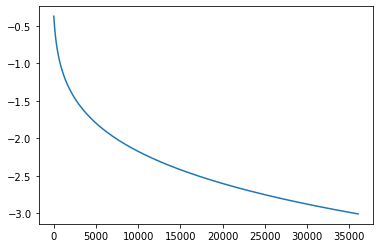

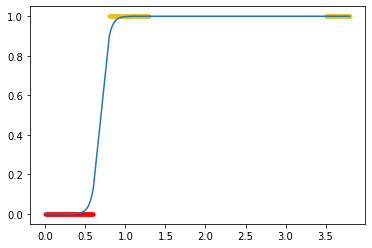

In [176]:
X_aug=np.array([np.ones(len(x)),x])

reg=logis_regression()

w_pred,err=reg.Regression_grad_des(X_aug,y,0.2,[1, 1])
print(w_pred)
plt.plot(err)
plt.show()

yp=reg.logis(X_aug,w_pred)

plt.plot(x[:100],y[:100],'.',color='red')
plt.plot(x[100:],y[100:],'.',color='#edbf1f')
plt.plot(x,yp)
plt.show()

# Classification of circularly separated data using logistic regression



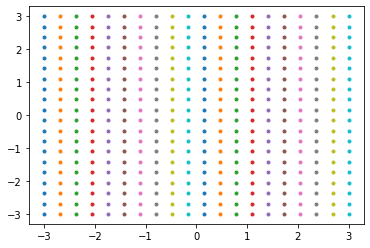

In [177]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')

  Using the above data generate circular data

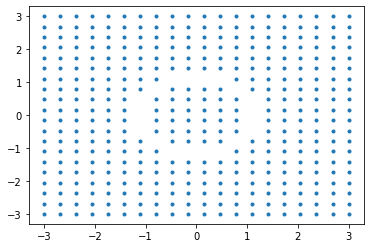

In [178]:
x1 = np.ravel(x11)
x2 = np.ravel(x22)
x = np.concatenate((x1.reshape(-1,1),x2.reshape(-1,1)),axis=1)

x1 = x[x[:,0]**2 + x[:,1]**2 <=1]
x2 = x[x[:,0]**2 + x[:,1]**2 >=1.5]

x=np.concatenate((x1,x2))

plt.plot(x[:,0],x[:,1],'.')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

(3, 380)


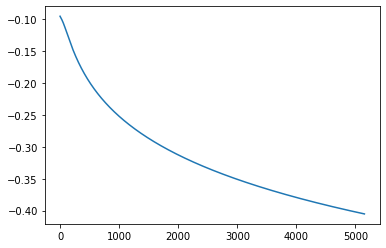

In [179]:
y1 = np.zeros((x1.shape[0]))
y2 = np.ones((x2.shape[0]))
y = np.concatenate((y1,y2))

X_aug = np.concatenate((np.ones((1,x.shape[0])), (x.T)**(2)),axis=0)
print(X_aug.shape)

reg = logis_regression()

w_pred,err = reg.Regression_grad_des(X_aug,y,0.3,[1, 1, 1])
y_pred = reg.logis(X_aug, w_pred)
plt.plot(err)

Plot classification using 0.5 as threshold

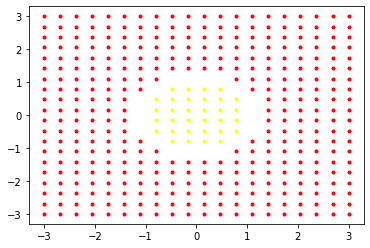

In [180]:
x0=x[y_pred<0.5]
x1=x[y_pred>=0.5]
plt.plot(x0[:,0],x0[:,1],'.',color='yellow')
plt.plot(x1[:,0],x1[:,1],'.',color='red')
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


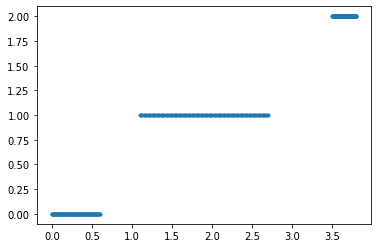

In [181]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [182]:
def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)


In [198]:
# plot for classification
def plot_op(x,y_pred):

  ind0 = np.where(y_pred<0.5)
  ind1 = np.where(y_pred>=0.5)
  x0=x[ind0]
  x1=x[ind1]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  plt.show()
  

Using the above function for plotting, plot the curve using different configurations

[-7.32390746  2.13234171  6.40636717]


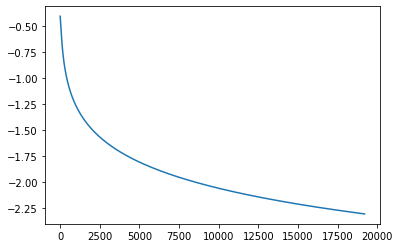

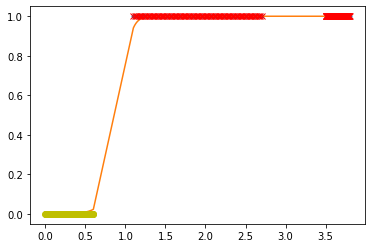

In [199]:
# take class 0 as '0' and other to '1'
idxx = (np.where(y!=0))
y1_mod = np.zeros(y.shape)
y1_mod[idxx]=np.ones((len(idxx)))

log_reg = logis_regression()

w1_pred,err = log_reg.Regression_grad_des(x_aug,y1_mod,0.1,[1, 1, 1])
plt.plot(err)
print(w1_pred)


# ploting
plt.figure()
plt.plot(x,y1_mod,'.')

y1_pred = log_reg.logis(x_aug,w1_pred)
plt.plot(x,y1_pred)
plot_op(x,y1_pred)


[  9.7412748  -15.16520053   3.86555793]


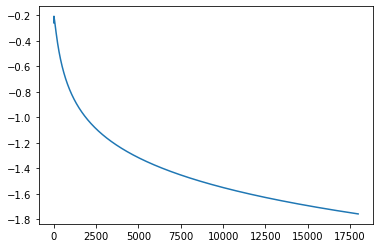

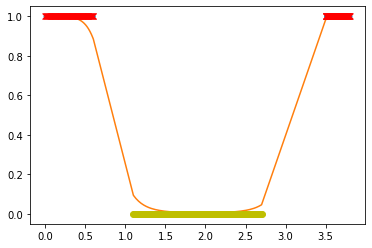

In [203]:
# take class 1 as '0' and other to '1'

idxx = (np.where(y!=1))
y2_mod = np.zeros(y.shape)
y2_mod[idxx]=np.ones((len(idxx)))

log_reg = logis_regression()

w2_pred,err = log_reg.Regression_grad_des(x_aug,y2_mod,0.1,[1, 1, 1])
plt.plot(err)
print(w2_pred)


# ploting
plt.figure()
plt.plot(x,y2_mod,'.')

y2_pred = log_reg.logis(x_aug,w2_pred)
plt.plot(x,y2_pred)
plot_op(x,y2_pred)



[ 6.75888708  5.8394916  -2.63248681]


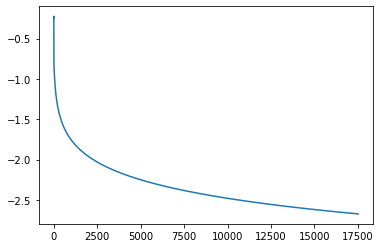

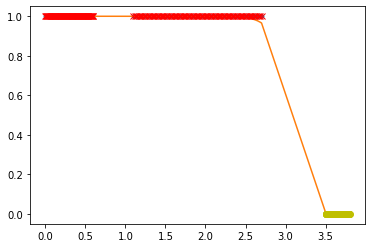

In [209]:
# Take class 2 as '0' and other to '1'

idxx = (np.where(y!=2))
y3_mod = np.zeros(y.shape)
y3_mod[idxx]=np.ones((len(idxx)))

log_reg = logis_regression()

w3_pred,err = log_reg.Regression_grad_des(x_aug,y3_mod,0.1,[1, 1, 1])
plt.plot(err)
print(w3_pred)


# ploting
plt.figure()
plt.plot(x,y3_mod,'.')

y3_pred = log_reg.logis(x_aug,w3_pred)
plt.plot(x,y3_pred)
plot_op(x,y3_pred)


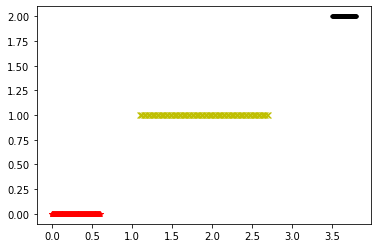

In [210]:
# final classification
ind1=np.where(y1_pred<0.5) 
ind2=np.where(y2_pred<0.5)
ind3=np.where(y3_pred<0.5)

x1=x[ind1]
x2=x[ind2]
x3=x[ind3]

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')